In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import cv2
import os
import numpy as np
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [15]:
img = image.load_img("D:\\data_set.jpg")

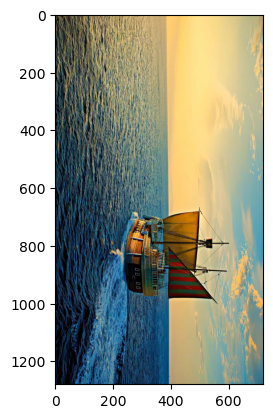

In [16]:
plt.imshow(img)

In [17]:
cv2.imread("D:\\data_set.jpg").shape

(1280, 720, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255) 
validation = ImageDataGenerator(rescale=1/255)

In [40]:
train_dataset = train.flow_from_directory("D:\\base data\\TESTING",
    target_size=(200, 200), 
    batch_size=3, 
    class_mode="binary"
)

Found 22 images belonging to 2 classes.


In [41]:
validation_dataset = train.flow_from_directory("D:\\base data\\VALIDATION", 
    target_size=(200, 200), 
    batch_size=3, 
    class_mode="categorical"
)


Found 22 images belonging to 2 classes.


In [42]:
train_dataset.class_indices 

{'HAPPY': 0, 'SAD': 1}

In [43]:
train_dataset.classes 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
x_test, y_test = next(validation_dataset)

print(x_test.shape)  
print(y_test.shape)  


(3, 200, 200, 3)
(3, 2)


In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [46]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.0001),  
    metrics=["accuracy"]
)


In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),  
    MaxPooling2D(2,2),
    Flatten(),  
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


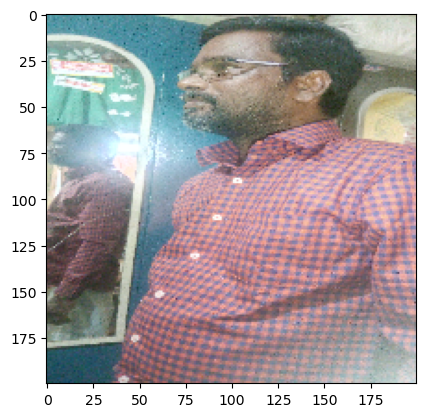

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted class: happy


In [48]:
import matplotlib.pyplot as plt


x_test, y_test = next(validation_dataset)


import random
idx2 = random.randint(0, len(y_test) - 1)  


plt.imshow(x_test[idx2, :])  
plt.show()


y_pred = model.predict(x_test[idx2, :].reshape(1, 200, 200, 3))  
y_pred = y_pred > 0.5 

print(f"Predicted class: {'sad' if y_pred[0] == 1 else 'happy'}")


In [49]:
model.save("model.h5")

In [53]:
import cv2
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("model.h5")

# Function to preprocess images
def preprocess_image(image_path, target_size=(224, 224)):  # Change size if needed
    img = cv2.imread(image_path)  # Load image
    img = cv2.resize(img, target_size)  # Resize
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to new dataset folder
dataset_path =("D:\\new dta")  # Change to your folder containing test images
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Loop through new images and predict
for image_file in image_files:
    image_path = os.path.join(dataset_path, image_file)
    
    img = preprocess_image(image_path)  # Preprocess the image
    
    prediction = model.predict(img)  # Predict
    
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get predicted class
    
    print(f"Image: {image_file}, Predicted Class: {predicted_class}")


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_16" is incompatible with the layer: expected axis -1 of input shape to have value 313632, but received input with shape (1, 394272)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None